## Notebook 1 - Tareas de Estadística para Data Science
### Programa: Magister en Data Sciences

<hr>
<b> Integrantes: </b>

<ul>
<li>Nicolas Pastor Bueno</li>
<li>Nicolas Klein Godoy</li>
<li>Luis Ramirez Vera</li>
</ul>
<hr>

# Descripción numérica de datos

In [197]:
# Cálculo del promedio (media aritmétrica)
# Nótese que los siguientes cálculos fueron realizados sobre una variable declarada de manera explícita en el código
import statistics
import warnings
warnings.filterwarnings('ignore')


data = [2, 2, 2, 2, 3, 4, 4, 6, 7, 8, 8, 9, 10, 11, 35]
x = statistics.mean(data) 
print("Promedio:", x)

Promedio: 7.533333333333333


In [198]:
# Cálculo de la varianza
x = statistics.variance(data)
print("Varianza:", x)

Varianza: 67.55238095238096


In [199]:
# Cálculo de la desviación estándar
x = statistics.stdev(data)
print("Desviación Estándar:", x)

Desviación Estándar: 8.219025547617003


In [200]:
# Cálculo de la mediana
x = statistics.median(data)
print("Mediana:", x)

Mediana: 6


In [201]:
# Cálculo de la moda
x = statistics.mode(data)
print("Moda:", x)

## Observar si este programa tiene la capacidad de detectar distribuciones multimodales

Moda: 2


In [202]:
# Cálculo de los percentiles
import numpy as np
data = [2, 2, 2, 2, 3, 4, 4, 6, 7, 8, 8, 9, 10, 11, 35]
print("Q1: ", np.percentile(data, 25, interpolation='nearest'))
print("Q2: ", np.quantile(data, .50)) 
print("Q3: ", np.quantile(data, .75, interpolation='nearest'))

## Notar que el cálculo no es igual al realizado de manera manual

Q1:  3
Q2:  6.0
Q3:  8


In [203]:
# Tarea 1.1: Calcular el rango de la variable declarada de manera explícita en el código

    # Respuesta : Para calcular el rango debemos restar el valor maximo menos el valor minimo del 
    # conjunto de datos. Para esto vemos 2 alternativas posibles. 

# Alternativa 1: Función Max(data) menos función Min(data) de los datos del arreglo.
range = max(data) - min(data)
print("El rango del conjunto de datos es", range)

# Alternativa 2: Ordenar los datos en orden ascendente y luego calcular el último valor (-1) menos
# el primer valor (0).
arrSort = np.sort(data)
range = (arrSort[-1] - arrSort[0])
print("El rango del conjunto de datos es", range)

El rango del conjunto de datos es 33
El rango del conjunto de datos es 33


In [204]:
# Tarea 1.2: Calcular el coeficiente de variación de la variable declarada de manera explícita 
# en el código

# Respuesta: Para obtener el coeficiente de variación se debe calcular la deviación estardar 
# de los datos dividido por el promedio.

coef_var = statistics.stdev(data) / statistics.mean(data) 
print("El coeficiente de variacion es", coef_var)

El coeficiente de variacion es 1.0910210903916375


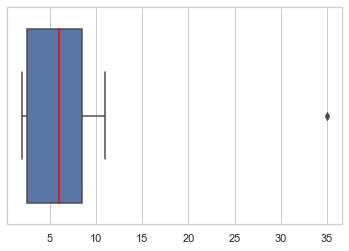

In [205]:
import seaborn as sns
sns.set(style="whitegrid")
data = [2, 2, 2, 2, 3, 4, 4, 6, 7, 8, 8, 9, 10, 11, 35]
ax = sns.boxplot(x=data, medianprops=dict(color="red", alpha=1))

<AxesSubplot:>

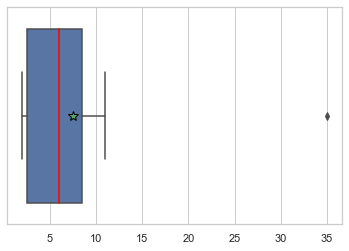

In [206]:
# Tarea 1.3 (pregunta desafiante): Investigar cuál es el múltiplo 'por default' que se asocia al RIQ 
# cuando usamos el boxplot de la librería 'seaborn'

# De acuerdo a documentación de la librería seaborn, el multiplo por defecto es 1.5 
# y es posible ajustarlo mediante el parametro opcional whis=1.5 .
# https://seaborn.pydata.org/generated/seaborn.boxplot.html
# https://stackoverflow.com/questions/43264095/python-seaborn-how-are-outliers-determined-in-boxplots

## Tarea 1.3.5 (bonus): Investigar cómo colocar la media en el gráfico, bien sea con seaborn u 
# otra librería.

# seaborn.boxplot(x=data, medianprops=dict(color="red", alpha=1), showmeans=True) 

# Respuesta: Para incorporar la media en el gráfico se debe utilizar el parametro showmeans=True. 
# Para configurar el marcador y color de marcador personalizados, 
# usaremos el argumento de palabra clave ‘meanprops’ como se muestra en el código a continuación.
    
sns.boxplot(
    x=data, 
    medianprops=dict(color="red", alpha=1), 
    showmeans=True, 
    meanprops={
        "marker": "*", 
        "markeredgecolor": "black",
        "markersize": "10"}
)

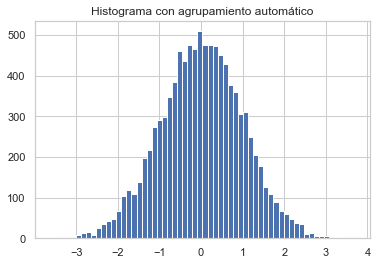

In [207]:
import matplotlib.pyplot as plt
rng = np.random.RandomState(10)
a = np.hstack((rng.normal(loc=0, scale=1, size=10000)))
plt.hist(a, bins='auto')
plt.title("Histograma con agrupamiento automático")
plt.show()

In [208]:
# Tarea 1.4 (pregunta desafiante): Investigar cual es el criterio bajo el cual el programa 
# anterior calcula el número de 'bins' o categorías o clases con el modo 'auto'


# Respuesta: La opción 'auto' obtiene el mayor y más óptimo número de bins usando los métodos 
# de estimación 'sturges' y 'fd' (Freedman Diaconis Estimator).
# La documentación oficial se encuentra en los siguientes links: 
# https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.hist.html
# https://numpy.org/doc/stable/reference/generated/numpy.histogram_bin_edges.html#numpy.histogram_bin_edges


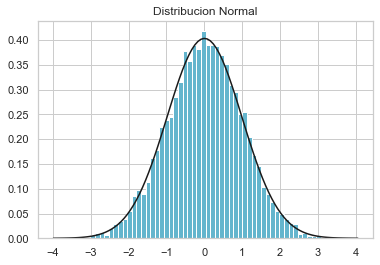

In [209]:
# Tarea 1.5: Investigar cómo lograr que se muestre un polígono (o curva) sobre las barras, que ponga en evidencia 
# aproximación a la campana de Gauss (esto con el mismo programa u otro)

# Respuesta: Para mostrar la curva sobre las barras se debe agregar al gráfico la PDF
# Probabilidad de la densidad de la poblacion (muestra).
# La fórmula se muestra en el siguiente código: 
# Documentacion: https://www.geeksforgeeks.org/how-to-plot-normal-distribution-over-histogram-in-python/

import numpy as np
from scipy.stats import norm
import matplotlib.pyplot as plt
  
#media y desviacion estandar
mu, std = norm.fit(a) 
#print(mu) -- Promedio
#print(std)  -- Desviación estándar
  
plt.hist(a, bins="auto", density=True, color='c')
  
xmin, xmax = plt.xlim()
x = np.linspace(xmin, xmax, 100)
p = norm.pdf(x, mu, std)
  
plt.plot(x, p, 'k')
title = "Distribucion Normal"
plt.title(title)
  
plt.show()


# Exploración de datos

In [210]:
# Importación de las librerías
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy.stats import norm
from sklearn.preprocessing import StandardScaler
from scipy import stats
import warnings
warnings.filterwarnings('ignore')

In [211]:
# Invocación de los datos
df_train = pd.read_excel('cars.xlsx')
df_train.head(10)

Make                     Model    Type  Origin DriveTrain   MSRP  Invoice  \
0  Acura                       MDX     SUV    Asia        All  36945    33337   
1  Acura            RSX Type S 2dr   Sedan    Asia      Front  23820    21761   
2  Acura                   TSX 4dr   Sedan    Asia      Front  26990    24647   
3  Acura                    TL 4dr   Sedan    Asia      Front  33195    30299   
4  Acura                3.5 RL 4dr   Sedan    Asia      Front  43755    39014   
5  Acura   3.5 RL w/Navigation 4dr   Sedan    Asia      Front  46100    41100   
6  Acura    NSX coupe 2dr manual S  Sports    Asia       Rear  89765    79978   
7   Audi               A4 1.8T 4dr   Sedan  Europe      Front  25940    23508   
8   Audi    A41.8T convertible 2dr   Sedan  Europe      Front  35940    32506   
9   Audi                A4 3.0 4dr   Sedan  Europe      Front  31840    28846   

   EngineSize Cylinders  Horsepower  MPG_City  MPG_Highway  Weight  Wheelbase  \
0         3.5         6         265        17           23    4451        106   
1         2.0         4         200        24           31    2778        101   
2         2.4         4         200        22           29    3230        105   
3         3.2         6         270        20           28    3575        108   
4         3.5         6         225        18           24    3880        115   
5         3.5         6         225        18           24    3893        115   
6         3.2         6         290        17           24    3153        100   
7         1.8         4         170        22           31    3252        104   
8         1.8         4         170        23           30    3638        105   
9         3.0         6         220        20           28    3462        104   

   Lenght  
0     189  
1     172  
2     183  
3     186  
4     197  
5     197  
6     174  
7     179  
8     180  
9     179

In [212]:
# Lista de las variables
df_train.columns

Index(['Make', 'Model', 'Type', 'Origin', 'DriveTrain', 'MSRP', 'Invoice',
       'EngineSize', 'Cylinders', 'Horsepower', 'MPG_City', 'MPG_Highway',
       'Weight', 'Wheelbase', 'Lenght'],
      dtype='object')

In [213]:
# Resumen de estadísticos descriptivos
df_train.describe()

MSRP        Invoice  EngineSize  Horsepower    MPG_City  \
count     428.000000     428.000000  428.000000  428.000000  428.000000   
mean    32774.855140   30014.700935    3.196729  215.885514   20.060748   
std     19431.716674   17642.117750    1.108595   71.836032    5.238218   
min     10280.000000    9875.000000    1.300000   73.000000   10.000000   
25%     20334.250000   18866.000000    2.375000  165.000000   17.000000   
50%     27635.000000   25294.500000    3.000000  210.000000   19.000000   
75%     39205.000000   35710.250000    3.900000  255.000000   21.250000   
max    192465.000000  173560.000000    8.300000  500.000000   60.000000   

       MPG_Highway       Weight   Wheelbase      Lenght  
count   428.000000   428.000000  428.000000  428.000000  
mean     26.843458  3577.953271  108.154206  186.362150  
std       5.741201   758.983215    8.311813   14.357991  
min      12.000000  1850.000000   89.000000  143.000000  
25%      24.000000  3104.000000  103.000000  178.000000  
50%      26.000000  3474.500000  107.000000  187.000000  
75%      29.000000  3977.750000  112.000000  194.000000  
max      66.000000  7190.000000  144.000000  238.000000

In [214]:
df_train['Invoice'].mean()

30014.70093457944

In [215]:
df_train['Invoice'].median()

25294.5

In [216]:
df_train['Invoice'].std()

17642.117750314763

In [217]:
df_train['Invoice'].var()

311244318.7159713

In [218]:
df_train['Invoice'].mode()

0    14207
1    19638
2    68306
dtype: int64

In [219]:
# Coeficiente de variación (CV) CV=std/mean

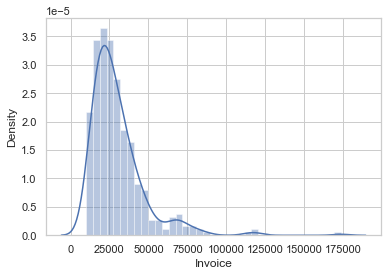

In [220]:
# Histograma
sns.distplot(df_train['Invoice']);

In [221]:
# Coeficientes de simetría y kurtosis (Medidas de forma)
print("Simetría: %f" % df_train['Invoice'].skew())
print("Kurtosis: %f" % df_train['Invoice'].kurt())

Simetría: 2.834740
Kurtosis: 13.946164


In [222]:
df_train['Invoice']

0      33337
1      21761
2      24647
3      30299
4      39014
       ...  
423    38203
424    40083
425    42573
426    24641
427    33112
Name: Invoice, Length: 428, dtype: int64

In [223]:
# Tarea 1.6: Investigar sobre los coeficientes de simetría y apuntamiento (Kurtosis)... Comprender qué significan
# valores negativos, cero y positivos para estos coeficientes.

    # Respuesta: Los coeficientes de simetria y curtosis se obtienen usando las funciones
    # skew y kurt respectivamente. 
    
    # Cada una es descrita a continuación: 
    
    # SIMETRIA: Este coeficiente indica la simetría de la distribución de una variable 
    # respecto a la media. 
     
    # dataFrame.skew() obtiene el coeficiente de simetria, es decir que tan concentrados 
    # estan los datos respecto de la media.
    # En el caso de ser POSITIVO, indica que los valores, estan mas concentrados a la izquierda 
    # de la media. (Datos  menores al promedio)
    # En el caso de ser CERO, indica que existe el mismo numero de valores a la izquierda y 
    # derecha. En este caso, la media, mediana y moda, son iguales. (Curva simetrica)
    # En el caso de ser NEGATIVO, indica que los valores estan mas concentrados a la derecha de 
    # la media. (Datos mayores al promedio)


    ##############################################################
    
    # CURTOSIS: Este coeficiente indica la cantidad de datos que hay cercanos a la media, de 
    # manera que a mayor grado de curtosis, más escarpada (o apuntada) será la forma de la curva. 
    
    # dataFrame.kurt() obtiene cuan alta o baja es la distribucion de valores. 
    
    # Si la curtosis es POSITIVA(ALTA), la curva es mas acampanada en el eje de ordenadas, generando 
    # una curva leptocurtica, esto cuando la curtosis es mayor a cero. Existe una alta concentración 
    # alrededor del promedio y con bajada de curva muy pronunciada.
    
    # Si la cursosis es CERO, la curva generada sera de tipo mesocurtica, significando una distribucion 
    # normal de la variable. En este casos los datos estan equilibrados y la curva tiene una altura media. 
    
    # Si la curtosis es NEGATIVA(BAJA), la curva es menos acampanada en el eje de ordenadas, generando 
    # una curva platicurtica, esto cuando la curtosis es menor a cero. En este caso, los datos se encuentra 
    # mucho mas distribuidos por lo que curva será mas achatada. 


In [224]:
# Tarea 1.7: Generar un contador que nos indique cuántos valores son menores y cuántos 
# son iguales o mayores que el promedio.
def countValues(column) :    
    less = 0;
    greatherThanOrEqual = 0
    for i in column :
        if (i < column.mean()) :
            less += 1
        else :
            greatherThanOrEqual += 1
            
    print("Valores menores al promedio: ", less)
    print("Valores mayores o iguales al promedio: ", greatherThanOrEqual)


#Llamado de metodo countValues
countValues(df_train['Invoice'])

Valores menores al promedio:  268
Valores mayores o iguales al promedio:  160


*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


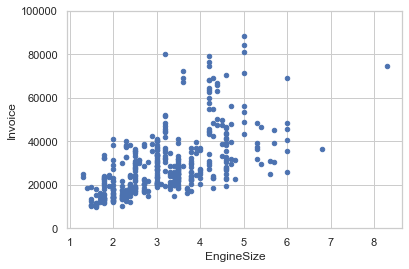

In [225]:
# Diagrama de dispersión para Invoice vs Horsepower
var = 'EngineSize'
data = pd.concat([df_train['Invoice'], df_train[var]], axis=1)
data.plot.scatter(x=var, y='Invoice', ylim=(0,100000));

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


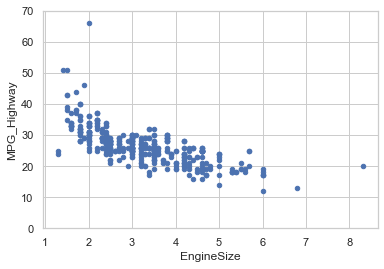

In [226]:
# Diagrama de dispersión para Horsepower vs EngineSize
var = 'EngineSize'
data = pd.concat([df_train['MPG_Highway'], df_train[var]], axis=1)
data.plot.scatter(x=var, y='MPG_Highway', ylim=(0,70));

In [227]:
# Investigar sobre el coeficiente de correlación Producto-Momento de Pearson (Coeficiente de Pearson)

    # Respuesta: 
    # El coeficiente de Pearson, se refiere a como se relacionan dos variables en un conjunto 
    # de datos, y se interpreta como que tan relacionada es una variable de la otra.
    #   - los valores que entrega este coeficiente, es entre -1 y 1
    #       - En el caso de -1, hay una asociacion negativa entre las veriables, cuando una sube, 
    #         la otra baja
    #       - En el caso de 0, no hay asociacion entre las variables
    #       - En el caso de 1, hay asociacion entre las variables, es decir, entre mas suba de valor
    #.        una, mas lo hara la otra


# Investigar también sobre el coeficiente de correlación de Spearmann (para variables cualitativas 
# medidas en escala ordinal)

    # Respuesta: 
    # La correlación de Spearman, realiza com parte del procedimiento de  análisis, el 
    # ordenamiento (Escala Ordinal) de las 2 variables involucradas y permite analizar tanto 2 
    # variables ordinales, como 1 variable ordinal y 1 variable escalar no parametrica. 
    # La correlación de Spearman no asume que las variables tengan una distribución normal.


In [228]:
#Tarea 1.7.1 (Bonus): Investigar cuál es el coeficiente de correlación idóneo cuando una de las variables
#implicadas es de tipo nominal.

    # Respuesta: 
    # Al tener variables de tipo nominales no parametricas, se ocuparia el coeficiente de correlacion de 
    # Mathews o coeficiente phi, el cual tendria que ser en base a un analisis de datos bivariados.
    # Para que pueda ser empleado en un caso determinado, ambas variables presentes deben ser de
    # carácter nominal, es decir, que el valor numérico con el que se representa a las mismas, sea 
    # arbitrario puesto que dichas variables no se vinculan con el orden lógico numérico.
    
    # El coeficiente phi tiene además una condición adicional para su aplicación formal, puesto que 
    # las variables aparte de ser de carácter nominal también deben ser dicotómicas reales, es decir,
    # con solo dos dimensiones  de valores posibles como lo sería el sexo que puede ser masculino o
    # femenino, por mencionar un ejemplo.

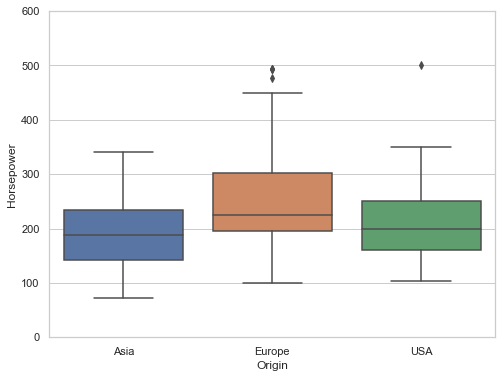

In [229]:
# Diagrama de caja para Horsepower vs Origin
var = 'Origin'
data = pd.concat([df_train['Horsepower'], df_train[var]], axis=1)
f, ax = plt.subplots(figsize=(8, 6))
fig = sns.boxplot(x=var, y="Horsepower", data=data)
fig.axis(ymin=0, ymax=600);

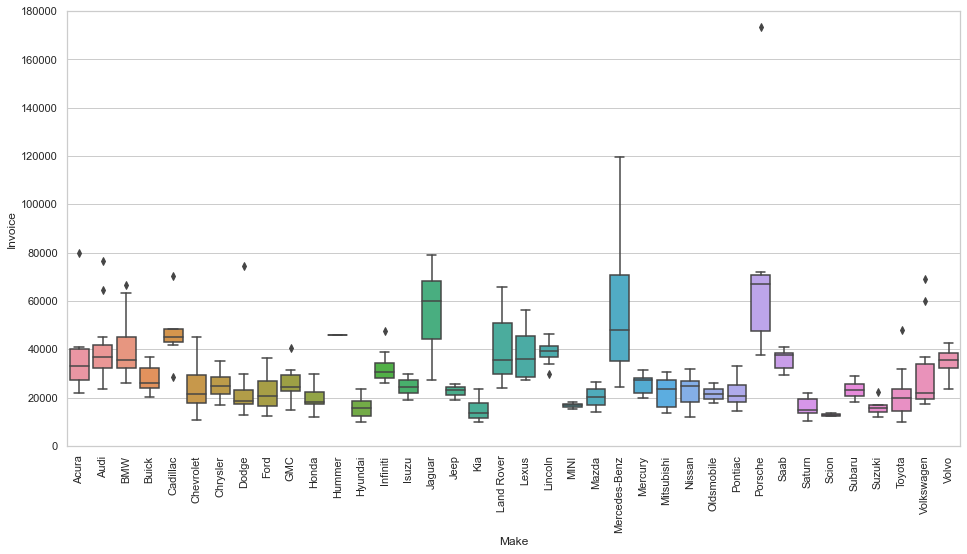

In [230]:
# Diagrama de caja para Invoice vs Make
var = 'Make'
data = pd.concat([df_train['Invoice'], df_train[var]], axis=1)
f, ax = plt.subplots(figsize=(16, 8))
fig = sns.boxplot(x=var, y="Invoice", data=data)
fig.axis(ymin=0, ymax=180000);
plt.xticks(rotation=90);

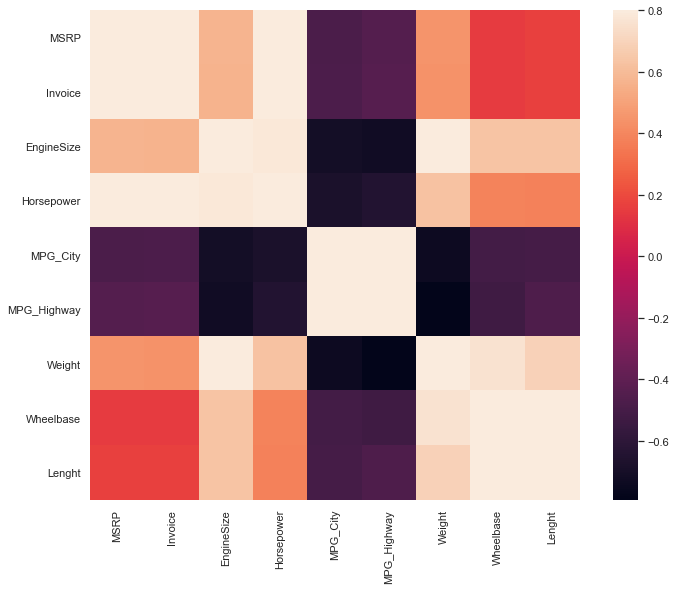

In [231]:
# Matriz de correlaciones y mapa de calor
corrmat = df_train.corr()
f, ax = plt.subplots(figsize=(12, 9))
sns.heatmap(corrmat, vmax=.8, square=True);

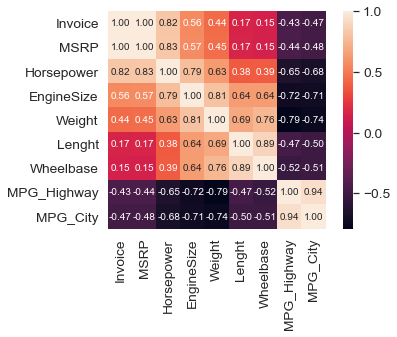

In [232]:
# Matriz de correlaciones de cada variable con Invoice
k = 10 # Cantidad de variables para el mapa de calor
cols = corrmat.nlargest(k, 'Invoice')['Invoice'].index
cm = np.corrcoef(df_train[cols].values.T)
sns.set(font_scale=1.25)
hm = sns.heatmap(cm, cbar=True, annot=True, square=True, fmt='.2f', annot_kws={'size': 10}, yticklabels=cols.values, xticklabels=cols.values)
plt.show()

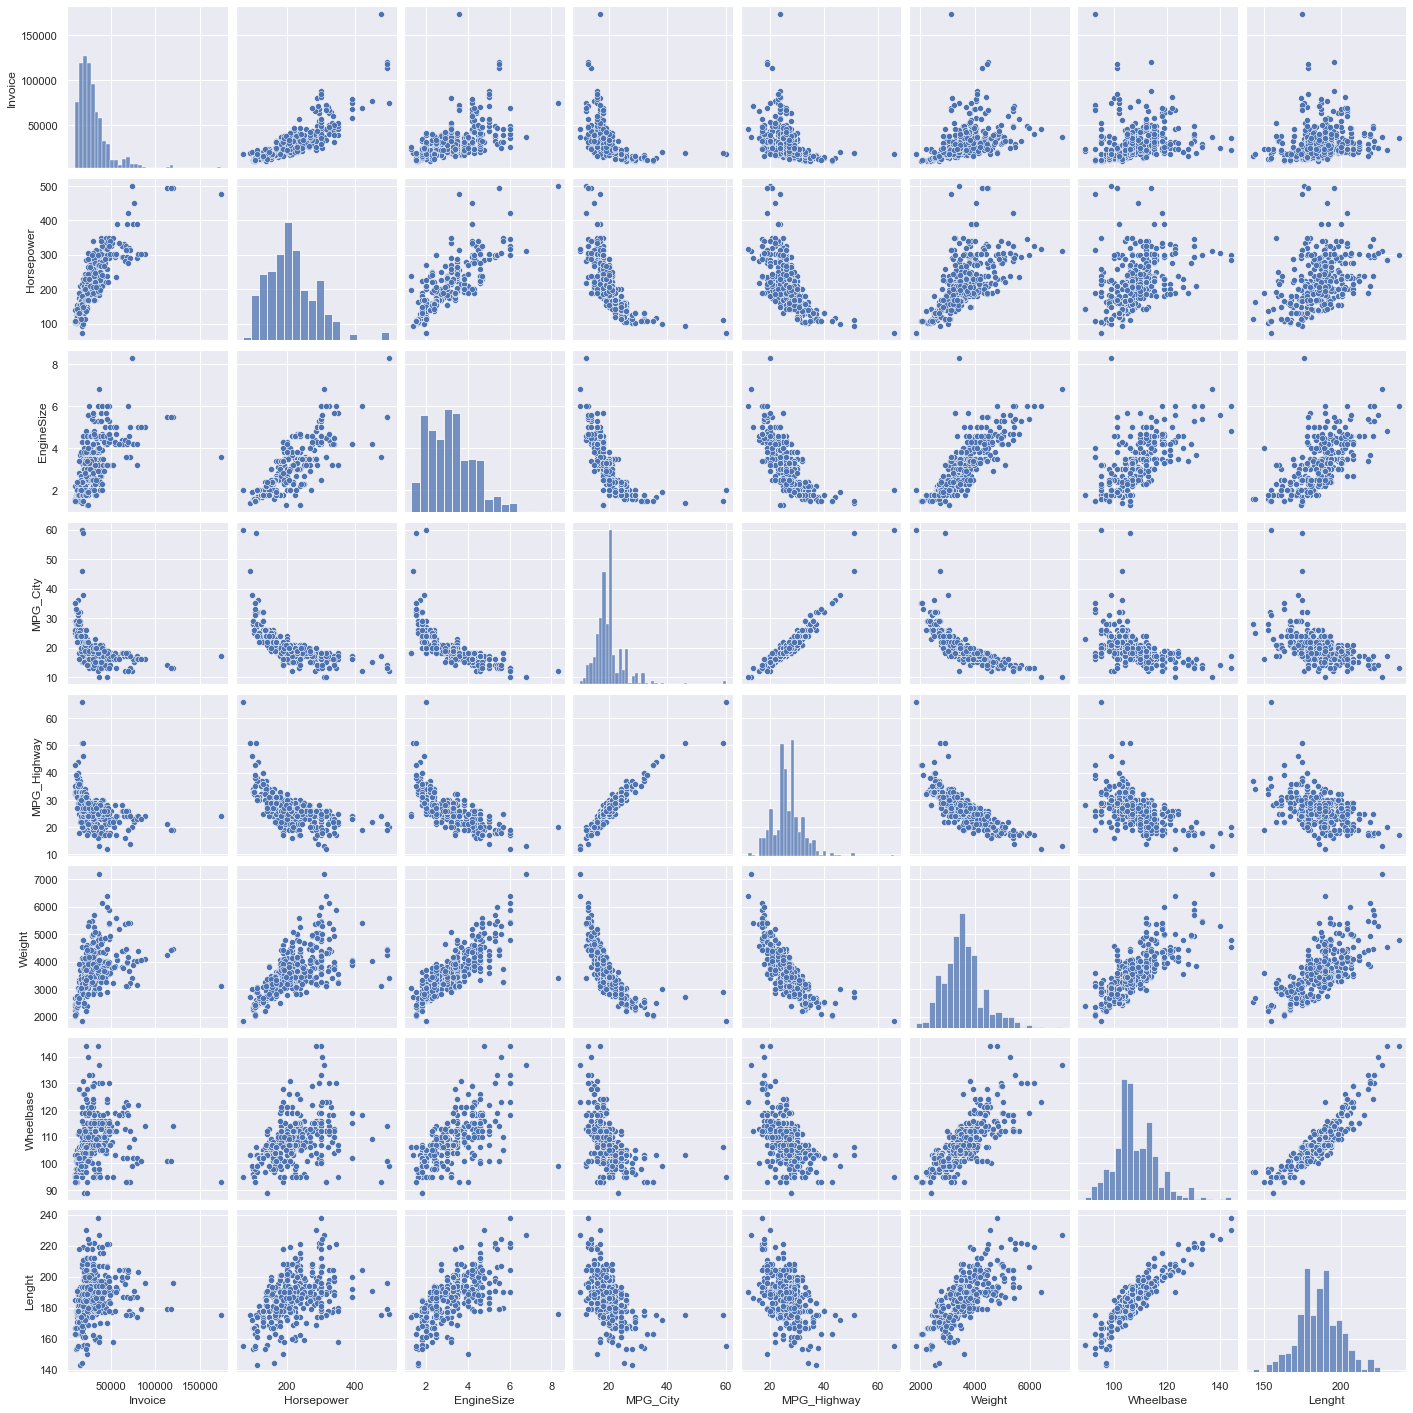

In [233]:
# Diagramas de dispersión
sns.set()
cols = ['Invoice', 'Horsepower', 'EngineSize', 'MPG_City', 'MPG_Highway', 'Weight', 'Wheelbase', 'Lenght']
sns.pairplot(df_train[cols], size = 2.5)
plt.show();

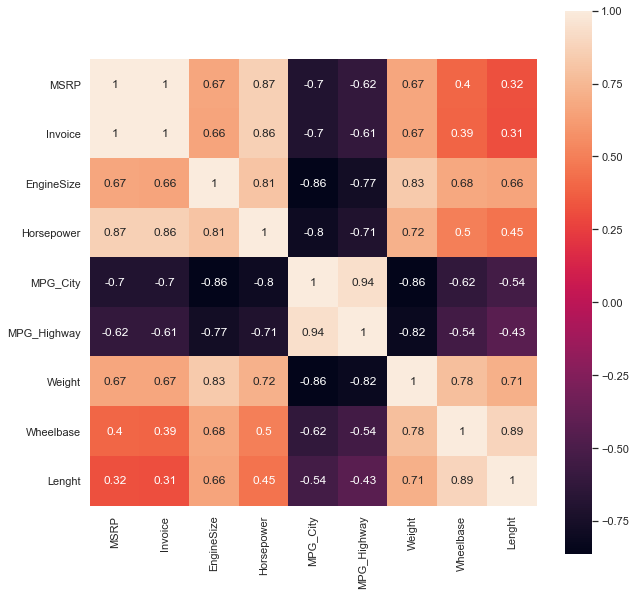

In [234]:
# Tarea 1.7.2 (Bonus): Investigar cómo construir un 'heat map' con coeficiente de Spearmann.

    # Respuesta:
    # Para construir el Heat map se debe especificar el parametro method="spearman".
    # La llamada es la siguiente: dataFrame.corr(method = 'spearman')  

corr_spearman = df_train.corr(method = "spearman")   ## Correlacion de Spearman
fig, ax = plt.subplots(figsize=(10,10))     
sns.heatmap(corr_spearman, annot=True, square=True, ax=ax);

In [235]:
# Datos perdidos
total = df_train.isnull().sum().sort_values(ascending=False)
percent = (df_train.isnull().sum()/df_train.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing_data.head(20)

Total   Percent
Cylinders        5  0.011682
Make             0  0.000000
Model            0  0.000000
Type             0  0.000000
Origin           0  0.000000
DriveTrain       0  0.000000
MSRP             0  0.000000
Invoice          0  0.000000
EngineSize       0  0.000000
Horsepower       0  0.000000
MPG_City         0  0.000000
MPG_Highway      0  0.000000
Weight           0  0.000000
Wheelbase        0  0.000000
Lenght           0  0.000000

In [236]:
# Tratamiento de datos perdidos
df_train = df_train.drop((missing_data[missing_data['Total'] > 1]).index,1)
df_train.isnull().sum().max() # Sólo para asegurarnos que no quedan datos perdidos...

0

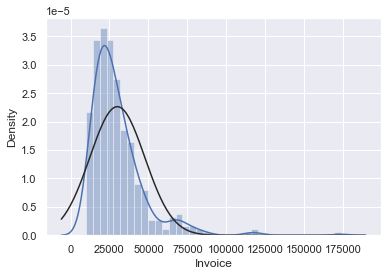

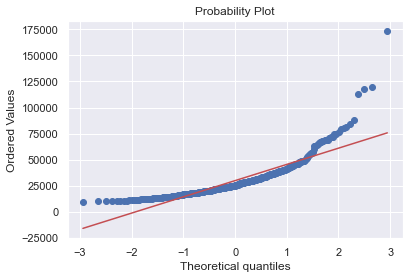

In [237]:
# Exámen de distribución de los datos
sns.distplot(df_train['Invoice'], fit=norm);
fig = plt.figure()
res = stats.probplot(df_train['Invoice'], plot=plt)

In [238]:
# Aplicando transformación logarítmica
df_train['Invoice'] = np.log(df_train['Invoice'])

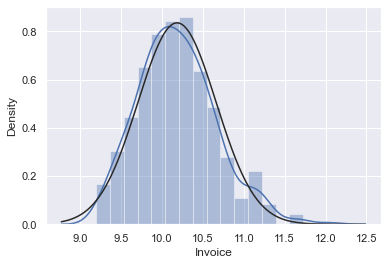

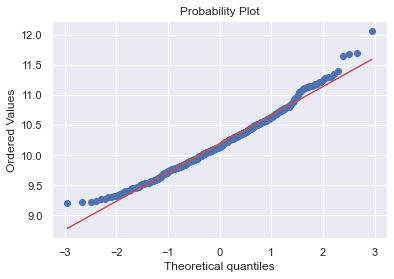

In [239]:
# Exámen de la distribución de los datos transformados
sns.distplot(df_train['Invoice'], fit=norm);
fig = plt.figure()
res = stats.probplot(df_train['Invoice'], plot=plt)

In [240]:
## Tarea 1.8 (anticipándonos al próximo tema): Investigar sobre pruebas analíticas de bondad de
## ajuste a la distribución normal.
## Probar si "invoice" tiene o no distribución normal, con base en alguna prueba analítica de bondad de ajuste
## Ejemplo: Anderson-Darling / Wilk-Shapiro / Jarque-Bera
    
    # Respuesta: 
    # Las pruebas de bondad de ajuste se utilizan para analizar si los datos de una muestra 
    # pueden considerarse que proceden de una determinada distribución o modelo de probabilidad. 
    # Por ejemplo, distribución normal, binomial,  Poisson, exponencial, etc. 
    # las pruebas de bondad de ajuste permiten verificar qué tipo de distribución siguen los 
    # datos y, por tanto, qué pruebas (paramétricas o no paramétricas) se pueden llevar a cabo.
    
    # Anderson-Darling: 
    # Esta prueba es una modificación de la pruebas Cramer–von Mises con la diferencia de que da un 
    # mayor peso a las colas de la distribución. Esta prueba utiliza hipotesis de distribución 
    # especificas cuando calcula sus valores críticos. Esta prueba es mas sensible que 
    # Cramer–von Mises. La desventaja es que los valores criticos deben ser calculadps por cada 
    # distribución especificada. 
    
    # Shapiro-Wilks : 
    # Esta prueba funciona en base a la hipotesis nula de que la población tiene una 
    # distribución normal. Por lo tanto, si el p value obtenido es menor que el valor alpha elegido,
    # entonces la hipotesis nula es rechazada  y esta es una evidencia de que los datos de la prueba 
    # no se encuentran normalmente ditribuidos. 
    # Por otra parte, si el value es mayor que el valor alpha elegido, entonces la hipotesis nula,
    # no puede ser rechazada.
    
    # Jarque-Bera: 
    # Esta prueba de bondad de ajuste permite comprobar si una muestra de datos tiene la asimetría y 
    # la curtosis de una distribución normal. El estadístico de Jarque-Bera se distribuye asintóticamente
    # como una distribución chi cuadrado con dos grados de libertad y puede usarse para probar la hipótesis
    # nula de que los datos pertenecen a una distribución normal. La hipótesis nula es una hipótesis 
    # conjunta de que la asimetría y el exceso de curtosis son nulos (asimetría = 0 y curtosis = 3). 
    
# Para este ejercicio se realiza la prueba analítica de Shapiro-Wilk para probar si la variable "invoice"
# se ajusta a la dristribución normal. 

# Ejecución de la Prueba de Shapiro-Wilk
from numpy.random import seed
from numpy.random import randn
from scipy.stats import shapiro

ALPHA = 0.05
stat, p = shapiro(df_train['Invoice'])

print("Estadístico: " , stat)
print("p Value: " , p)
print("")

if p > ALPHA:
    print('H0: La variable invoice se ajusta a distribución normal.')
else:
    print('HA: La variable invoice NO se ajusta a distribución normal.')


Estadístico:  0.9831107258796692
p Value:  6.868362834211439e-05

HA: La variable invoice NO se ajusta a distribución normal.


In [241]:
## Tarea 1.9 (Cierre): Realizar una exploración completa de su propio set de datos.

# Para esta tarea realizamos la exploración de un Data Set de Airbnb que contiene 
# alojamientos disponibles en distintos sectores de Nueva York, USA en el año 2019.

# Importación de las librerías
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy.stats import norm
from sklearn.preprocessing import StandardScaler
from scipy import stats
import warnings
warnings.filterwarnings('ignore')

In [242]:
# Invocación de los datos

df_BNB = pd.read_csv("AB_NYC_2019.csv")
df_BNB.head(10)

#Se observa el head del dataframe con los primeros 10 datos

id                                              name  host_id  \
0  2539                Clean & quiet apt home by the park     2787   
1  2595                             Skylit Midtown Castle     2845   
2  3647               THE VILLAGE OF HARLEM....NEW YORK !     4632   
3  3831                   Cozy Entire Floor of Brownstone     4869   
4  5022  Entire Apt: Spacious Studio/Loft by central park     7192   
5  5099         Large Cozy 1 BR Apartment In Midtown East     7322   
6  5121                                   BlissArtsSpace!     7356   
7  5178                  Large Furnished Room Near B'way      8967   
8  5203                Cozy Clean Guest Room - Family Apt     7490   
9  5238                Cute & Cozy Lower East Side 1 bdrm     7549   

     host_name neighbourhood_group       neighbourhood  latitude  longitude  \
0         John            Brooklyn          Kensington  40.64749  -73.97237   
1     Jennifer           Manhattan             Midtown  40.75362  -73.98377   
2    Elisabeth           Manhattan              Harlem  40.80902  -73.94190   
3  LisaRoxanne            Brooklyn        Clinton Hill  40.68514  -73.95976   
4        Laura           Manhattan         East Harlem  40.79851  -73.94399   
5        Chris           Manhattan         Murray Hill  40.74767  -73.97500   
6        Garon            Brooklyn  Bedford-Stuyvesant  40.68688  -73.95596   
7     Shunichi           Manhattan      Hell's Kitchen  40.76489  -73.98493   
8    MaryEllen           Manhattan     Upper West Side  40.80178  -73.96723   
9          Ben           Manhattan           Chinatown  40.71344  -73.99037   

         room_type  price  minimum_nights  number_of_reviews last_review  \
0     Private room    149               1                  9  2018-10-19   
1  Entire home/apt    225               1                 45  2019-05-21   
2     Private room    150               3                  0         NaN   
3  Entire home/apt     89               1                270  2019-07-05   
4  Entire home/apt     80              10                  9  2018-11-19   
5  Entire home/apt    200               3                 74  2019-06-22   
6     Private room     60              45                 49  2017-10-05   
7     Private room     79               2                430  2019-06-24   
8     Private room     79               2                118  2017-07-21   
9  Entire home/apt    150               1                160  2019-06-09   

   reviews_per_month  calculated_host_listings_count  availability_365  
0               0.21                               6               365  
1               0.38                               2               355  
2                NaN                               1               365  
3               4.64                               1               194  
4               0.10                               1                 0  
5               0.59                               1               129  
6               0.40                               1                 0  
7               3.47                               1               220  
8               0.99                               1                 0  
9               1.33                               4               188

In [243]:
df_BNB.columns

Index(['id', 'name', 'host_id', 'host_name', 'neighbourhood_group',
       'neighbourhood', 'latitude', 'longitude', 'room_type', 'price',
       'minimum_nights', 'number_of_reviews', 'last_review',
       'reviews_per_month', 'calculated_host_listings_count',
       'availability_365'],
      dtype='object')

In [244]:
df_BNB.describe()

# Este es un analisis descriptivo de todas las variables, cuantos registros por 
# Eje columnas
# - columnas (eje X)
#
# Eje filas
# - promedio
# - desviacion 
# - estandar 
# - minimos 
# - máximos 
# - percentiles 25, 50 y 75

id       host_id      latitude     longitude         price  \
count  4.889500e+04  4.889500e+04  48895.000000  48895.000000  48895.000000   
mean   1.901714e+07  6.762001e+07     40.728949    -73.952170    152.720687   
std    1.098311e+07  7.861097e+07      0.054530      0.046157    240.154170   
min    2.539000e+03  2.438000e+03     40.499790    -74.244420      0.000000   
25%    9.471945e+06  7.822033e+06     40.690100    -73.983070     69.000000   
50%    1.967728e+07  3.079382e+07     40.723070    -73.955680    106.000000   
75%    2.915218e+07  1.074344e+08     40.763115    -73.936275    175.000000   
max    3.648724e+07  2.743213e+08     40.913060    -73.712990  10000.000000   

       minimum_nights  number_of_reviews  reviews_per_month  \
count    48895.000000       48895.000000       38843.000000   
mean         7.029962          23.274466           1.373221   
std         20.510550          44.550582           1.680442   
min          1.000000           0.000000           0.010000   
25%          1.000000           1.000000           0.190000   
50%          3.000000           5.000000           0.720000   
75%          5.000000          24.000000           2.020000   
max       1250.000000         629.000000          58.500000   

       calculated_host_listings_count  availability_365  
count                    48895.000000      48895.000000  
mean                         7.143982        112.781327  
std                         32.952519        131.622289  
min                          1.000000          0.000000  
25%                          1.000000          0.000000  
50%                          1.000000         45.000000  
75%                          2.000000        227.000000  
max                        327.000000        365.000000

In [245]:
df_BNB['price'].mean()
#Es el promedio de la variable price
#El precio promedio es de 152.7

152.7206871868289

In [246]:
df_BNB['price'].std()
# Es la desviacion estandar
# La desviacion estandar entre precios es de 240.15

240.15416974718727

In [247]:
df_BNB['price'].median()
#Es la media de la variable price
#la media del precio es de 106 por ID

106.0

In [248]:
df_BNB['price'].var()
# Es la varianza de la variable price
# La variacion entre los datos de price es 57674.02524696084

57674.02524696084

In [249]:
df_BNB['price'].mode()
# Es la moda de la variable price
# El precio que mas se repite es 100

0    100
dtype: int64

In [250]:
# Coeficiente de variación (CV) CV=std/mean

STD_BNB = df_BNB['price'].std()
MEAN_BNB = df_BNB['price'].mean()

CV = STD_BNB / MEAN_BNB

CV

# Coeficiente de variacion entre la desviacion estandar y el promedio

#El coeficiente de variacion entre la desviacion estandar y el promedio de la variable price es de 
#1.572, lo que significa que es muy variable la variable price sobre su promedio.

1.5725058220396673

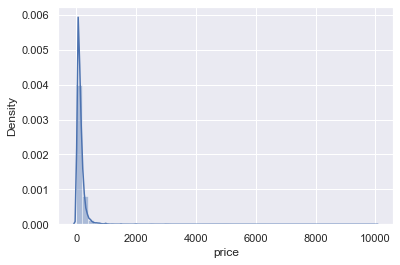

In [251]:
# Histograma
sns.distplot(df_BNB['price']);

# La mayor densidad de precios esta antes de los 1000

In [252]:
# Coeficientes de simetría y kurtosis (Medidas de forma)
print("Simetría: %f" % df_BNB['price'].skew())
print("Kurtosis: %f" % df_BNB['price'].kurt())

# Podemos observar que segun el coeficiente de simetria la variable se encuentra sesgada hacia la 
# izquierda por ser positiva.
# Podemos observar que la variable price segun los datos tiene una orientacion leptocurtica

Simetría: 19.118939
Kurtosis: 585.672879


In [253]:
df_BNB['price']

# Se observa las caracteristicas de la variable price

0        149
1        225
2        150
3         89
4         80
        ... 
48890     70
48891     40
48892    115
48893     55
48894     90
Name: price, Length: 48895, dtype: int64

In [254]:
#Contador que nos indiqua cuántos valores son menores y cuántos 
# son iguales o mayores que el promedio.
def countValuesBnb(column) :    
    less = 0;
    greatherThanOrEqual = 0
    for i in column :
        if (i < column.mean()) :
            less += 1
        else :
            greatherThanOrEqual += 1
            
    print("Valores menores al promedio: ", less)
    print("Valores mayores o iguales al promedio: ", greatherThanOrEqual)


#Llamado de metodo countValuesBnb
countValuesBnb(df_BNB['price'])

# Al contar la cantidad de valores bajo el promedio e iguales o mayor al promedio podemos ver que 
# tiende a existir sentido el hecho que sea una muestra asimetrica positiva hacia la izquierda, cercana 
# al cero y que sea una variable leptocurtica ya que su mayor concetracion es con sesgo positivo con 
# tendencia a cero. 

Valores menores al promedio:  34016
Valores mayores o iguales al promedio:  14879


*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


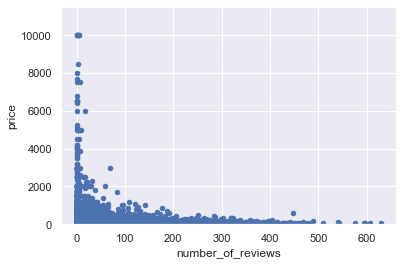

In [255]:
# Diagrama de dispersión para price v/s number_of_reviews

data = pd.concat([df_BNB['price'], df_BNB['number_of_reviews']], axis=1)
data.plot.scatter(x='number_of_reviews', y='price', ylim=(0, 11500));

# Podemos observar en el diagrama que el precio es indirectamente 
# correlacionado con el numeros de reviews. menor precio mayor numero de reviews

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


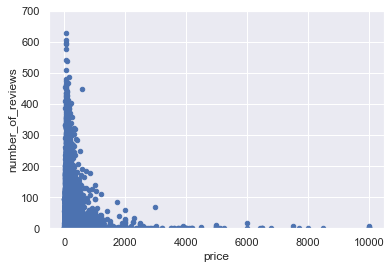

In [256]:
# Diagrama de dispersión para number_of_reviews  v/s price

data = pd.concat([df_BNB['number_of_reviews'], df_BNB['price']], axis=1)
data.plot.scatter(x='price', y='number_of_reviews', ylim=(0,700));

# Vemos al comprobar de manera inversa la dispersion continua con la logica de menor precio mayor cantidad de reviews

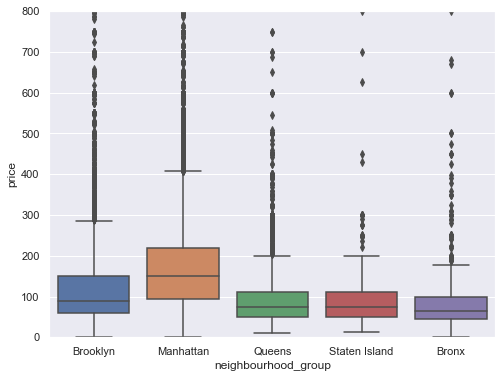

In [257]:
# Diagrama de caja neighbourhood_group V/S price
var = 'neighbourhood_group'
data = pd.concat([df_BNB['price'], df_BNB[var]], axis=1)
f, ax = plt.subplots(figsize=(8, 6))
fig = sns.boxplot(x=var, y="price", data=data)
fig.axis(ymin=0, ymax=800);

# En este dragrama podemos observar como el precio se distribuye por los distintos barrios y que 
# barrio tiene un precio mayor observamos que Manhattan tiene mayor precio que Bronx y asi vemos como 
# un barrio como Brooklyn tiene mayor precio que Queens y Staten Island, pero que entre estas ultimos
# barrios no hay mayor diferencia

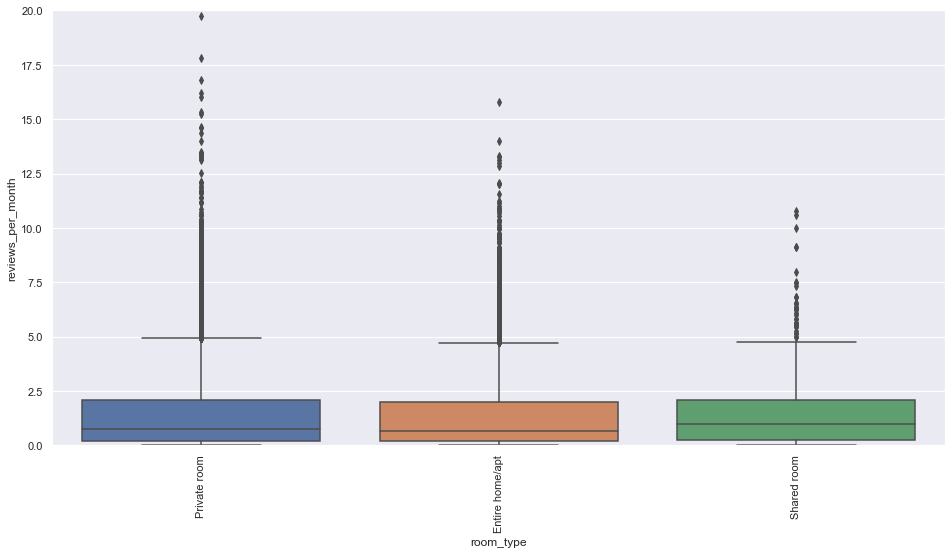

In [258]:
# Diagrama de caja room_type V/S reviews_per_month
var = 'room_type'
data = pd.concat([df_BNB['reviews_per_month'], df_BNB[var]], axis=1)
f, ax = plt.subplots(figsize=(16, 8))
fig = sns.boxplot(x=var, y="reviews_per_month", data=data)
fig.axis(ymin=0, ymax=20);
plt.xticks(rotation=90);

# Aca vemos los reviews por mes con respecto al tipo de alojamiento y observamos que la variacion de 
# reviews por mes es mayor en Private Room y menor en Shared Room.

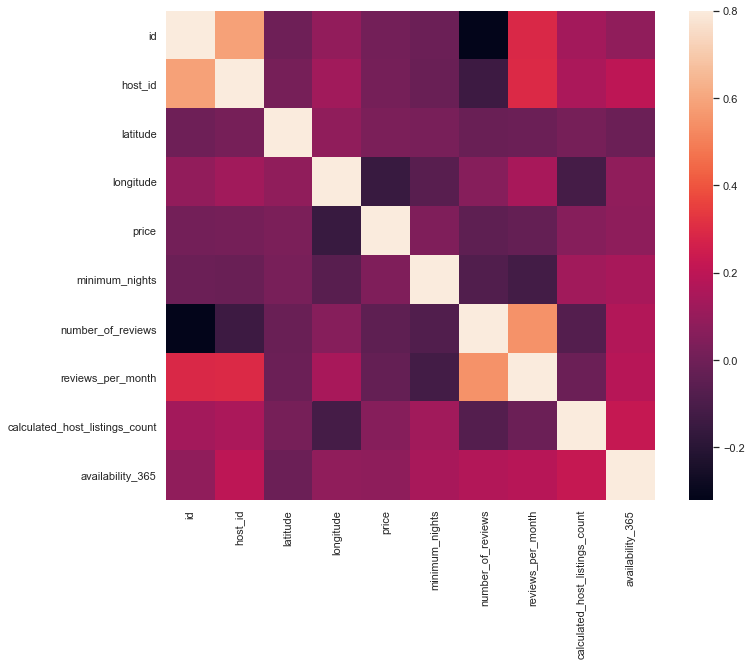

In [259]:
# Matriz de correlaciones y mapa de calor
corrmat = df_BNB.corr()
f, ax = plt.subplots(figsize=(12, 9))
sns.heatmap(corrmat, vmax=.8, square=True);

# En esta matriz vemos como se correlacionan todas las variables del data set

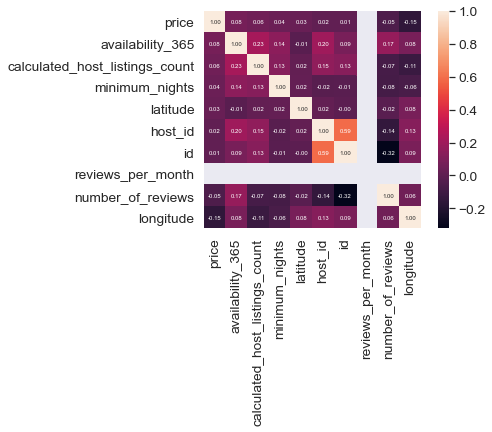

In [260]:
# Matriz de correlaciones de cada variable con price
k = 16 # Cantidad de variables para el mapa de calor
cols = corrmat.nlargest(k, 'price')['price'].index
cm = np.corrcoef(df_BNB[cols].values.T)
sns.set(font_scale=1.25)
hm = sns.heatmap(cm, cbar=True, annot=True, square=True, fmt='.2f', annot_kws={'size': 6}, yticklabels=cols.values, xticklabels=cols.values)
plt.show()

# En esta matriz podemos ver como se correlacionan las variavles con respecto a la variable price
# podemos observar que el numero de reviews por mes es una variable con mayor correlacion con la 
# variable price mientras mas revies mayor es el precio, esto se debe a la logica de la demanda, 
# mayor demanda mayor precio.



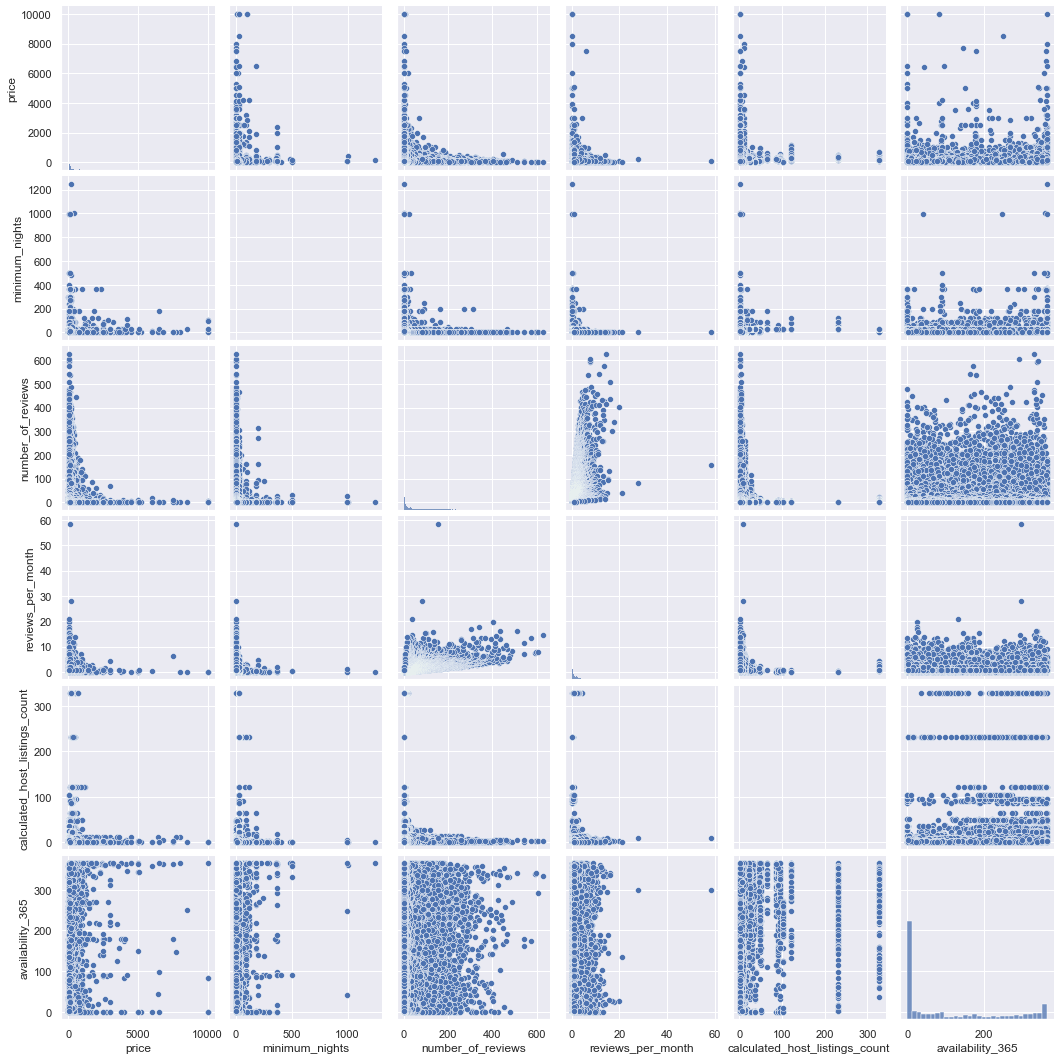

In [261]:
# Diagramas de dispersión
sns.set()
cols = ['neighbourhood_group', 'neighbourhood', 'room_type', 'price', 'minimum_nights', 'number_of_reviews', 'last_review', 'reviews_per_month', 'calculated_host_listings_count','availability_365']
sns.pairplot(df_BNB[cols], size = 2.5)
plt.show();

# En estos diagramas podemos ver la dispersion de las variavles con ellas mismas, llama la atencion 
# que el precio tiene una gran variacion con la disponibilidad de 365, podemos pensar que esto se debe 
# a una poca estacionaldiad del servicio.

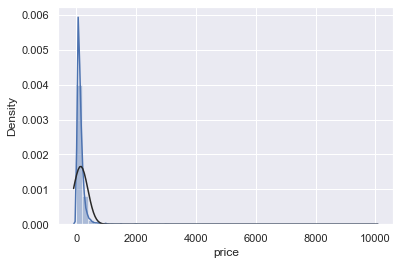

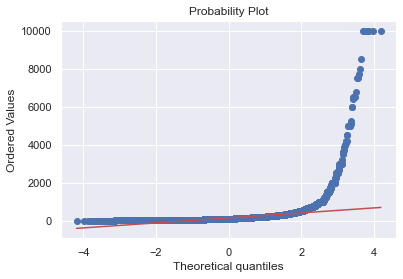

In [262]:
# Exámen de distribución de los datos
sns.distplot(df_BNB['price'], fit=norm);
fig = plt.figure()
res = stats.probplot(df_BNB['price'], plot=plt)

In [265]:
# Aplicando transformación logarítmica
df_BNB['price'] = np.log(df_BNB['price'])

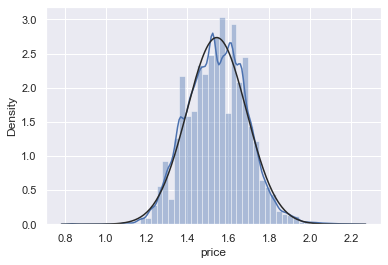

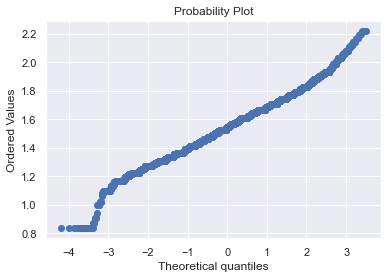

In [266]:
# Exámen de la distribución de los datos transformados
sns.distplot(df_BNB['price'], fit=norm);
fig = plt.figure()
res = stats.probplot(df_BNB['price'], plot=plt)

# Al realizar el examen de distribucion se observa que la variacion tiende a una distribucion normal
# pero para esto se debe llevar al logaritmo, ya que sino se observa la kurtosis 

In [267]:
# Ejecución de la Prueba de Shapiro-Wilk
from numpy.random import seed
from numpy.random import randn
from scipy.stats import shapiro

ALPHA = 0.05
stat, p = shapiro(df_BNB['price'].dropna())

print("Estadístico: " , stat)
print("p Value: " , p)
print("")

if p > ALPHA:
    print('H0: La variable price se ajusta a distribución normal.')
else:
    print('HA: La variable price NO se ajusta a distribución normal.')

Estadístico:  0.9959787130355835
p Value:  6.1366318916112734e-33

HA: La variable price NO se ajusta a distribución normal.


# Distribuciones de probabilidad

In [268]:
import seaborn as sns
import numpy as np

In [269]:
# Distribuciones discretas de probabilidad

In [270]:
# Distribución binomial
from scipy.stats import binom
data_binom = binom.rvs(n=100,p=0.1,size=100)
print(data_binom)

[ 8  7 10  8  6 11  7  9 11  8 14  8  9 12  6 11 10  9 12 17 10 13 10 15
  6 16  7 13 10  9  8 13 10  8 12  7  9  7 12 10  9  9 11 13 14  4  9  6
  8  5  9 13 13 11  7 13 11  9 10  8 12 10 15  6  9 10  9  7 11  8 11 10
 13  6 12  6  6 11 12 13 10 12  8 11  6 14  8  7 12 10  5 10  9  7 13 14
  6  7  9  9]


[Text(0.5, 0, 'Número de éxitos'), Text(0, 0.5, 'Frecuencia absoluta')]

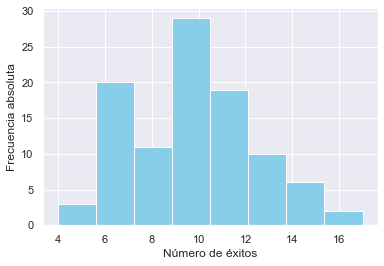

In [271]:
ax = sns.distplot(data_binom,
                  kde=False,
                  color='skyblue',
                  hist_kws={"linewidth": 1,'alpha':1})
ax.set(xlabel='Número de éxitos', ylabel='Frecuencia absoluta')

[Text(0.5, 0, 'Número de éxitos'), Text(0, 0.5, 'Frecuencia relativa')]

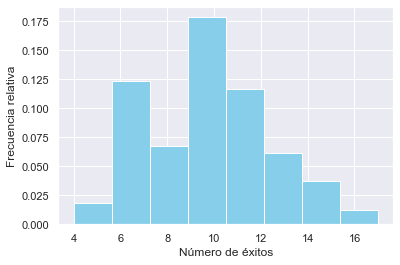

In [272]:
## Tarea 1.10: Convertir la frecuencia absoluta en frecuencia relativa, de manera de poder 
## interpretarla como probabilidad, conforme n aumenta sin cota.

    # Respuesta: 
    # Se puede convertir el eje Y en una Frecuencia Relativa, utilizando la función de seaborn 
    # seaborn.distplot()  y añadiendo el parametro norm_hist=True. 
    # Tambien se puede imprimir la densidad usando el parametro KDE en true.

ax = sns.distplot(data_binom,
                  kde=False,
                  color='skyblue',
                  norm_hist=True,
                  hist_kws={"linewidth": 1,'alpha':1})
ax.set(xlabel='Número de éxitos', ylabel='Frecuencia relativa')


In [273]:
# Cálculo de probabilidad binomial
# prob = binom.pmf(x, n, p)
prob = binom.pmf(4, 10, 0.5)
print (prob)

0.20507812500000022


In [274]:
# prob = binom.pmf(x, n, p)
prob = binom.cdf(10, 10, 0.7)
print (prob)

1.0


In [275]:
# Número de éxitos en 'n' ensayos independientes del mismo experimento aleatorio
numero = binom.rvs(n=10,p=0.5,size=1)
print (numero)

[5]


In [276]:
# Distribución Poisson
from scipy.stats import poisson
data_poisson = poisson.rvs(mu=10, size=100)
print (data_poisson)

[ 6  9 13  9 10  8  9 14 13  9  8 16 16  3 10 12 15 11 13  9 13  9 10  8
  9 15 15 10  7 10  8  7  8 11  9 16  8  6 12  6  8 10  5  8 11 10 12  7
 11 13  6  8 10  9 12  8 10  9 11 11 12 10  6 13 12 12 13  7 14 11 12  9
  8  6  8 12  3 13 10 16  9  9 15 12  6  4  8 12 13  8  7 10  5 11  8  4
  4 12 10  7]


[Text(0.5, 0, 'Número de eventos independientes'),
 Text(0, 0.5, 'Frecuencia absoluta')]

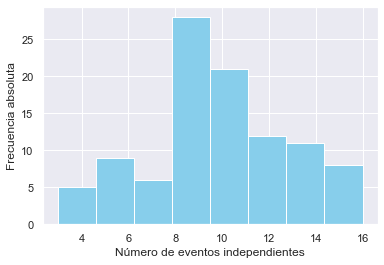

In [277]:
ax = sns.distplot(data_poisson,
                  kde=False,
                  color='skyblue',
                  hist_kws={"linewidth": 1,'alpha':1})
ax.set(xlabel='Número de eventos independientes', ylabel='Frecuencia absoluta')

In [278]:
# Cálculo de probabilidad de Poisson
# prob = poisson.pmf(x, mu)
prob = poisson.pmf(1000, 9)
print (prob)

0.0


In [279]:
# prob = poisson.pmf(x, n, p)
prob = poisson.cdf(70, 7)
print (prob)

1.0


In [280]:
# Distribuciones contínuas de probabilidad

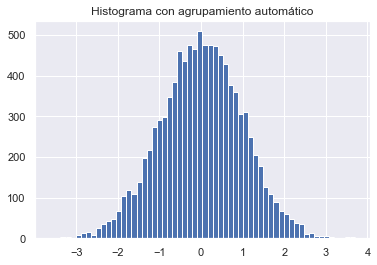

In [281]:
# Distribución normal estándar (Z)
import matplotlib.pyplot as plt
rng = np.random.RandomState(10)
a = np.hstack((rng.normal(loc=0, scale=1, size=10000)))
plt.hist(a, bins='auto')
plt.title("Histograma con agrupamiento automático")
plt.show()

In [282]:
# Cálculo de probabilidad normal estándar
# prob = normal.cdf(x, loc, scale)
from scipy.stats import norm
prob = norm.cdf(x=-100, loc=5, scale=1)
print (prob)

# Probabilidad acumulada desde menos infinito hasta hasta X=1, para una distribución normal con 
# promedio = 5 y desviación estándar = 1

0.0


In [283]:
# Tarea 1.11 (Pregunta desafiante). Investigar en la documentación oficial y alternativa de la librería, 
# lo que se calcula mediante el 'pdf'

    # Probability Density Function (pdf): Calcula la probabilidad de que un valor de la variable,
    # caiga dentro del area de la curva gausiana dentro de un intervalo a-b.
    # ej: De un estudio de estatura de una muestra de 10000 personas, que tan probable es que una 
    #     persona al azar, mida entre 1.50-1.80 mts
    

In [284]:
# Tarea 1.12: Calcular la probabilidad puntual de que X=1, utilizando la documentación oficial de la librería numpy.
# Calcular también las siguientes probabilidades: Prob(X=100); Prob (X=0): Prob (X=-250).

    #Respuesta: Se crea la funcion para obtener la probabilidad de que una variables aleatoria, 
    #tome un valor determinado. Para obtener esta probabilida, se ocupa la funcion 
    #scipy.stats.norm.pdf(x, loc, scale)
    #donde
    # - x: valor aleatorio
    # - loc: media
    # - scale: desviacion estandar

def probability(xParam) :
    return norm.pdf(x=xParam, loc=5, scale=1)

print('probabilidad:' , probability(1))
print('probabilidad:' , probability(100))
print('probabilidad:' , probability(0))
print('probabilidad:' , probability(-250))

probabilidad: 0.00013383022576488537
probabilidad: 0.0
probabilidad: 1.4867195147342979e-06
probabilidad: 0.0


In [285]:
# Cálculo de valor cuantil de la distribución normal
# prob = normal.rvs(x, n, p)
from scipy.stats import norm
variable = norm.rvs(loc=5, scale=1, size=1)
print (variable)

[5.57257692]
